In [1]:
import tensorflow as tf
import os
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

TRAIN_PATH = 'train_images_x/'
MASK_PATH = 'train_images_y/'
# TEST_PATH = 'test_images/'

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

#get train and test IDs
train_ids = next(os.walk(TRAIN_PATH))[2]
# test_ids = next(os.walk(TEST_PATH))[1]

#Get and resize train images and masks
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_(True))


In [3]:
#strip the .jpg from the file names
train_ids = [i.split('.')[0] for i in train_ids]

len(train_ids)

3376

In [4]:

# print('Getting and resizing train images and masks ... ')
for n, id_ in enumerate(train_ids):
    img_path = TRAIN_PATH + id_
    img = tf.keras.preprocessing.image.load_img(img_path + '.jpg', target_size=(IMG_HEIGHT, IMG_WIDTH))
    X_train[n] = tf.keras.preprocessing.image.img_to_array(img)

    mask_path = MASK_PATH + id_ 
    mask = tf.keras.preprocessing.image.load_img(mask_path + '.png', target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode = "grayscale")
    Y_train[n] = tf.keras.preprocessing.image.img_to_array(mask)



In [5]:
X_train.shape, Y_train.shape

((3376, 256, 256, 3), (3376, 256, 256, 1))

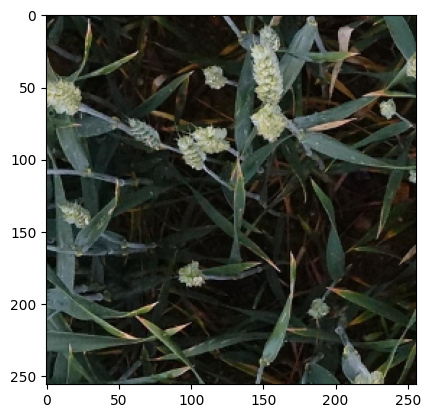

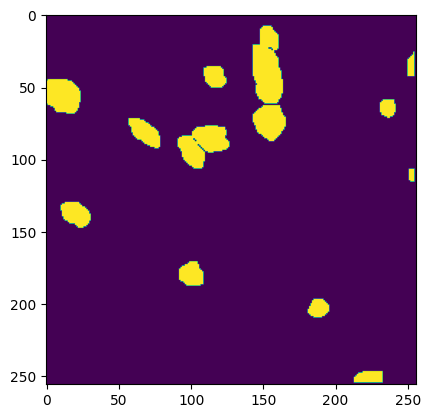

In [26]:
# check if training data looks all right

plt.imshow(X_train[22])
plt.show()
plt.imshow(np.squeeze(Y_train[22]))
plt.show()


In [27]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 

In [28]:

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                             

In [32]:

#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_wheat.h5', verbose=1, save_best_only=True)
checkpoint_best = tf.keras.callbacks.ModelCheckpoint('./models/best_'+"unet"+'.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
checkpoint_last = tf.keras.callbacks.ModelCheckpoint('./models/last_'+"unet"+'.h5', save_weights_only=False, verbose=1)
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs'),
        checkpoint_best,
        checkpoint_last]

In [34]:
#Train the model
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=50, callbacks=callbacks)


Epoch 1/50
190/190 [==============================] - ETA: 0s - loss: 0.1306 - accuracy: 0.9482
Epoch 1: val_loss improved from inf to 0.12539, saving model to ./models\best_unet.h5

Epoch 1: saving model to ./models\last_unet.h5


d:\Projects\.vs code\Wheat_Segmentation_Mask\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


190/190 [==============================] - 523s 3s/step - loss: 0.1306 - accuracy: 0.9482 - val_loss: 0.1254 - val_accuracy: 0.9492
Epoch 2/50
190/190 [==============================] - ETA: 0s - loss: 0.1180 - accuracy: 0.9532
Epoch 2: val_loss improved from 0.12539 to 0.11004, saving model to ./models\best_unet.h5

Epoch 2: saving model to ./models\last_unet.h5
190/190 [==============================] - 514s 3s/step - loss: 0.1180 - accuracy: 0.9532 - val_loss: 0.1100 - val_accuracy: 0.9566
Epoch 3/50
190/190 [==============================] - ETA: 0s - loss: 0.1109 - accuracy: 0.9560
Epoch 3: val_loss improved from 0.11004 to 0.10705, saving model to ./models\best_unet.h5

Epoch 3: saving model to ./models\last_unet.h5
190/190 [==============================] - 512s 3s/step - loss: 0.1109 - accuracy: 0.9560 - val_loss: 0.1070 - val_accuracy: 0.9585
Epoch 4/50
190/190 [==============================] - ETA: 0s - loss: 0.1048 - accuracy: 0.9583
Epoch 4: val_loss did not improve from 0

In [35]:
# use in terminal --> %tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [8]:
from tensorflow.keras.models import load_model
import tensorflow as tf
savedModel=load_model('models/best_unet.h5')

In [9]:
import tf2onnx
import onnx

onnx_model, _ = tf2onnx.convert.from_keras(savedModel)
onnx.save(onnx_model, "models/bests_unet.onnx")

# Calculating mAP

In [13]:
import numpy as np
import onnxruntime
from sklearn.metrics import average_precision_score

onnx_model_path = "models/bests_unet.onnx"  # Provide the path to your ONNX model file
sess = onnxruntime.InferenceSession(onnx_model_path)

# convert the X_train to the float32
X_train = X_train.astype(np.float32)


# Use the ONNX model to make predictions on X_train[100]
predictions = sess.run(None, {"input_1": X_train[:101]})[0]

# Compute mAP
APs = []
for i in range(len(X_train[:101])):
    y_true = np.ravel(Y_train[i])  # Flatten ground truth mask
    y_pred = np.ravel(predictions[i])  # Flatten predicted mask
    AP = average_precision_score(y_true, y_pred)
    APs.append(AP)

# Compute mAP
mAP = np.mean(APs)

In [14]:
print("mAP:", mAP)

mAP: 0.9254412447656275
